<font color=green size=7>Exploração dos Dados do Enem 2021</font>

### Exame nacional do Ensino Médio

O <b>Exame Nacional do Ensino Médio (Enem)</b> foi instituído em 1998, com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. Em 2009, o exame aperfeiçoou sua metodologia e passou a ser utilizado como mecanismo de acesso à educação superior. Desde 2020, o participante pode escolher entre fazer o exame impresso ou o Enem Digital, com provas aplicadas em computadores, em locais de prova definidos pelo Inep.  
                                                                               <b>Fonte:</b> Site do Inep 
    


### Fonte dos Dados

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

### Dicionário do Dataset

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|M|Masculino|
|F|Feminino|

> ### Faixa Etária
> ***

|Código|Descrição|
|---|---|
|1|Menor de 17 anos|
|2|17 anos|
|3|18 anos|
|4|19 anos|
|5|20 anos|
|6|21 anos|
|7|22 anos|
|8|23 anos|
|9|24 anos|
|10|25 anos|
|11|Entre 26 e 30 anos|
|12|Entre 31 e 35 anos|
|13|Entre 36 e 40 anos|
|14|Entre 41 e 45 anos|
|15|Entre 46 e 50 anos|
|16|Entre 51 e 55 anos|
|17|Entre 56 e 60 anos| 
|18|Entre Entre 61 e 65 anos|
|19|Entre 66 e 70 anos|
|20|Maior de 70 anos|


> ### Questionário Q001 e Q002
> ***

|Código|Descrição|
|---|---|
|A|Nunca estudou|
|B|Não completou a 4ª série/5º ano do Ensino Fundamental|
|C|Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental|
|D|Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio|
|E|Completou o Ensino Médio, mas não completou a Faculdade|
|F|Completou a Faculdade, mas não completou a Pós-graduação|
|G|Completou a Pós-graduação|
|H|Não sei|

> ### Cor/Raça
> ***

|Código|Descrição|
|---|---|
|1|Não declarado|
|2|Branca|
|3|Preta|
|4|Parda|
|5|Amarela|
|6|Indígena|

In [107]:
# Importar a biblioteca pandas e numpy para manipular os dados armazenados no dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# utilizar o método pd.read_csv para ler o arquivo csv
dados_enem = pd.read_csv("MICRODADOS_ENEM_2021.csv", encoding="ISO -8859-1", sep = ';')

In [3]:
# imprimir as 5 primeiras linhas do dataset
dados_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [4]:
# utilizar o metodo shape para conhecer o numero de linhas e colunas do dataset
print('O dataframe possui {} linhas e {} colunas'.format(dados_enem.shape[0],dados_enem.shape[1]))


O dataframe possui 3389832 linhas e 76 colunas


In [5]:
# visualiar todas as colunas presente no dataset irá imprimir uma array
dados_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [6]:
# vamos selecionar algumas colunas

colunas_selecionadas = ['NU_INSCRICAO','NU_ANO','TP_SEXO','TP_FAIXA_ETARIA',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE','NO_MUNICIPIO_PROVA',
       'SG_UF_ESC','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT','NU_NOTA_REDACAO','Q001', 'Q002','Q024', 'Q025']

In [7]:
dados_selecionado = dados_enem.filter(items=colunas_selecionadas)
dados_selecionado.head()

,NU_INSCRICAO,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_PROVA,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q024,Q025
0,210053865474,2021,F,5,1,1,1,Nova Lima,NaN,NaN,574.6,472.6,NaN,760.0,F,F,B,B
1,210052384164,2021,M,12,1,1,1,Maceió,NaN,505.9,551.8,498.3,461.5,560.0,B,B,A,A
2,210052589243,2021,F,13,3,1,1,Ferraz de Vasconcelos,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,B
3,210052128335,2021,M,3,1,3,1,Crato,CE,580.7,678.9,638.9,659.5,780.0,B,B,B,B
4,210051353021,2021,F,2,1,3,1,Acarape,CE,497.7,532.4,457.6,582.6,780.0,D,E,B,B


<b>Método info():</b> Este método imprime informações sobre um DataFrame, incluindo o índice dtype e colunas, valores não nulos e uso de memória.


In [8]:
dados_selecionado.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   NU_INSCRICAO        3389832 non-null  int64  
 1   NU_ANO              3389832 non-null  int64  
 2   TP_SEXO             3389832 non-null  object 
 3   TP_FAIXA_ETARIA     3389832 non-null  int64  
 4   TP_ESTADO_CIVIL     3389832 non-null  int64  
 5   TP_COR_RACA         3389832 non-null  int64  
 6   TP_NACIONALIDADE    3389832 non-null  int64  
 7   NO_MUNICIPIO_PROVA  3389832 non-null  object 
 8   SG_UF_ESC           813806 non-null   object 
 9   NU_NOTA_CN          2245844 non-null  float64
 10  NU_NOTA_CH          2378379 non-null  float64
 11  NU_NOTA_LC          2378379 non-null  float64
 12  NU_NOTA_MT          2245844 non-null  float64
 13  NU_NOTA_REDACAO     2378379 non-null  float64
 14  Q001                3389830 non-null  object 
 15  Q002           

## Iremos fazer algumas perguntas para o Dataset

### 1) Qual a distribuição de sexo declarado no Enem?

In [9]:
dist_sexo = dados_selecionado['TP_SEXO']
freq_sexo = dist_sexo.value_counts()
freq_sexo

F    2090526
M    1299306
Name: TP_SEXO, dtype: int64

In [10]:
# iremos utilizar o paramentro normalize para tirar o percentual
percentual=dist_sexo.value_counts(normalize = True)*100
percentual.round()

F    62.0
M    38.0
Name: TP_SEXO, dtype: float64

In [11]:
# construir uma tabela com a frequencia e porcentagem do sexo declarado 
dist_freq_qualitativas = pd.DataFrame({'Frequência': freq_sexo, 'Porcentagem (%)': percentual.round()})
dist_freq_qualitativas.rename(index = {"M": 'Masculino', "F": 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace =True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Feminino,2090526,62.0
Masculino,1299306,38.0




Segundo um levamanento feito pelo Instituto Semesp, 57% dos estudantes matriculados nas instituições de ensino superiores são do sexo feminino.(https://agenciabrasil.ebc.com.br/educacao/noticia/2020-05/mapa-do-ensino-superior-aponta-para-maioria-feminina-e-branca) 

<b>Conclusão: </b> Com o resultado dos dados encontrado no dataset o qual mostra que 62% dos candidatos são do sexo feminino e 38% do sexo masculino o resultado mostrado pelo conjunto de dados só corrobora com pesquisa feita pelo Instituto Semesp.

### 2) Qual relação de distribuição da  faixa etária dos candidatos por sexo?

In [12]:
# utilizar o metodo groupby para agrupar a variável
faixa_etaria_sexo = ['TP_FAIXA_ETARIA','TP_SEXO']
faixaetaria_sexo = dados_enem.filter(items = faixa_etaria_sexo)
faixa1 = faixaetaria_sexo.query("TP_FAIXA_ETARIA == 1").groupby('TP_SEXO').count()


In [13]:
faixa1

,TP_FAIXA_ETARIA
TP_SEXO,
F,184125
M,90193


In [32]:
Contagem_sexo_F = faixaetaria_sexo.query('TP_SEXO == "F"').value_counts().to_frame().reset_index()
Contagem_sexo_F.columns = ['Faixa_Etária', 'Sexo', 'Total']
Contagem_sexo_F.head()


,Faixa_Etária,Sexo,Total
0,3,F,431685
1,2,F,388078
2,4,F,244843
3,1,F,184125
4,5,F,154204


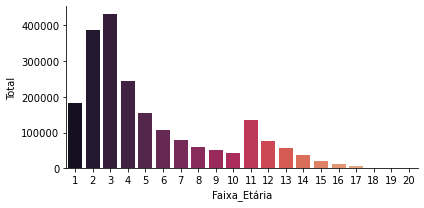

In [66]:
sns.catplot(x = 'Faixa_Etária', y = 'Total', kind = 'bar', data= Contagem_sexo_F,
           aspect = 2, height = 3,palette = 'rocket')

In [67]:
Contagem_sexo_M = faixaetaria_sexo.query('TP_SEXO == "M"').value_counts().to_frame().reset_index()
Contagem_sexo_M.columns = ['Faixa_Etária', 'Sexo', 'Total']
Contagem_sexo_M.head()

,Faixa_Etária,Sexo,Total
0,3,M,267680
1,2,M,232706
2,4,M,149846
3,5,M,96486
4,11,M,93411


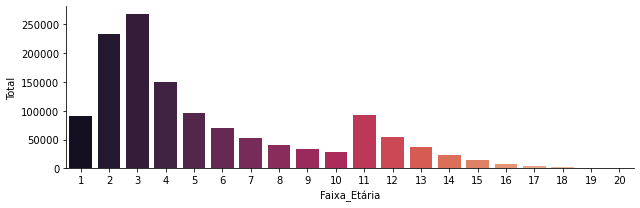

In [105]:
sns.catplot(x = 'Faixa_Etária', y = 'Total', kind = 'bar', data= Contagem_sexo_M,
           aspect = 3, height = 3,palette = 'rocket')

In [93]:
Contagem_sexo = faixaetaria_sexo.value_counts().to_frame().reset_index()
Contagem_sexo.columns = ['FAIXA_ETARIA','SEXO','TOTAL']
Contagem_sexo


,FAIXA_ETARIA,SEXO,TOTAL
0,3,F,431685
1,2,F,388078
2,3,M,267680
3,4,F,244843
4,2,M,232706
5,1,F,184125
6,5,F,154204
7,4,M,149846
8,11,F,134163
9,6,F,107762


In [110]:
dict_faixa_etaria = {1:'Menor de 17 anos', 2:'17 anos', 3:'18 anos', 4:'19 anos',5:'20 anos',
6:'21 anos', 7:'22 anos', 8:'23 anos', 9:'24 anos', 10:'25 anos', 11:'Entre 26 e 30 anos',
12:'Entre 31 e 35 anos', 13:'Entre 36 e 40 anos', 14:'Entre 41 e 45 anos', 15:'Entre 46 e 50 anos',
16:'Entre 51 e 55 anos', 17:'Entre 56 e 60 anos', 18:'Entre 61 e 65 anos',19:'Entre 66 e 70 anos',
20:'Maior de 70 anos'}

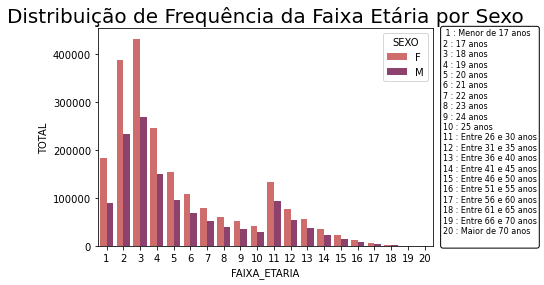

In [148]:
ax = sns.barplot(data=Contagem_sexo, x='FAIXA_ETARIA', y='TOTAL', hue='SEXO',palette = 'flare')
ax.set_title("Distribuição de Frequência da Faixa Etária por Sexo", fontsize = 20)


textdict = " "
for key,value in dict_faixa_etaria.items():
    textdict = textdict + "{k} : {v}\n".format(k=key,v=value)

ax.text(1.03, 0.01, textdict, transform=ax.transAxes, fontsize = 8, color = 'black',
       bbox = {'boxstyle': 'round', 'facecolor': 'white', 'alpha': 1})
ax=ax

In [ ]:
textdictq002 = " "
for key,value in dicionarioq01q02.items():
    textdictq002 = textdictq002 + "{k} : {v}\n".format(k=key,v=value)